In [1]:
import gzip
import pickle
import seaborn as sns

In [2]:
with gzip.open("explored-models/models.pkl.gz", "rb") as pkl:
    data = pickle.load(pkl)

data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions
0,btc-mh-2,bitcoin,2,0,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),0.037451,66,3,168
1,btc-ms-2,bitcoin,0,2,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),0.002307,10,3,12
2,eth-2-ms-2,ethereum-wp-2,0,2,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),0.004281,10,3,12
3,eth-3-ms-2,ethereum-wp-3,0,2,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),0.004396,10,3,12
4,byz-2-ms-2,ethereum-bz-2,0,2,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),0.002428,10,3,12
...,...,...,...,...,...,...,...,...,...,...
67,btc-ms-10,bitcoin,0,10,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),6.857648,4283,3,17224
68,btc-ms-11,bitcoin,0,11,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),11.379407,6525,3,27065
69,btc-ms-12,bitcoin,0,12,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),18.683452,9592,3,41014
70,btc-ms-13,bitcoin,0,13,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),29.617790,13738,3,60081


In [3]:
data.groupby("protocol").agg({"maximum_height": "max", "maximum_size": "max"})

,maximum_height,maximum_size
protocol,,
bitcoin,8,14
ethereum-bz-2,0,8
ethereum-bz-3,0,8
ethereum-wp-2,0,8
ethereum-wp-3,0,8
parallel-2,0,9
parallel-3,0,9
parallel-4,0,9


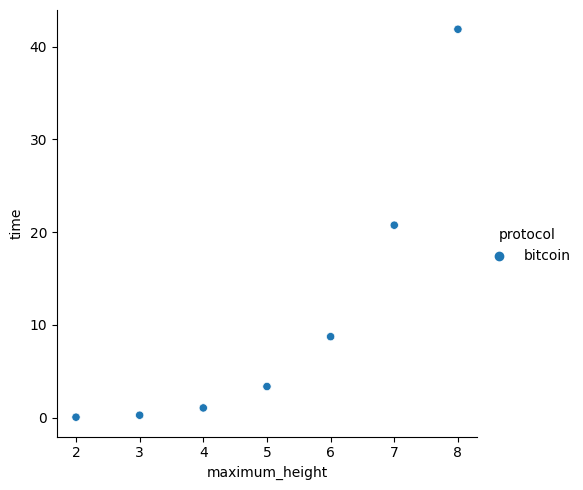

In [4]:
sns.relplot(
    data.query("maximum_height > 0"),
    x="maximum_height",
    y="time",
    hue="protocol",
)

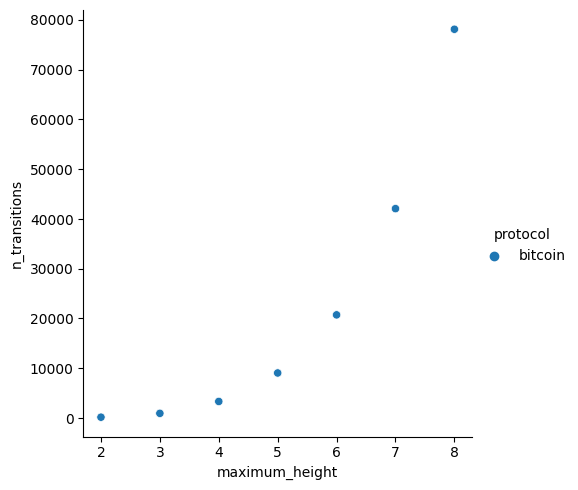

In [5]:
sns.relplot(
    data.query("maximum_height > 0"),
    x="maximum_height",
    y="n_transitions",
    hue="protocol",
)

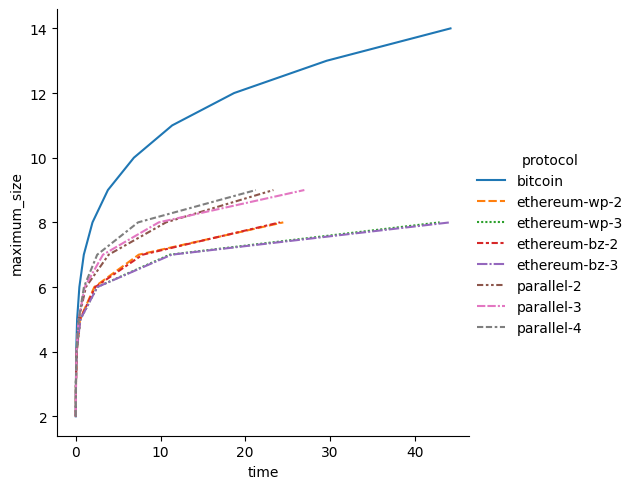

In [6]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="time",
    y="maximum_size",
    hue="protocol",
    style="protocol",
)
g.set()

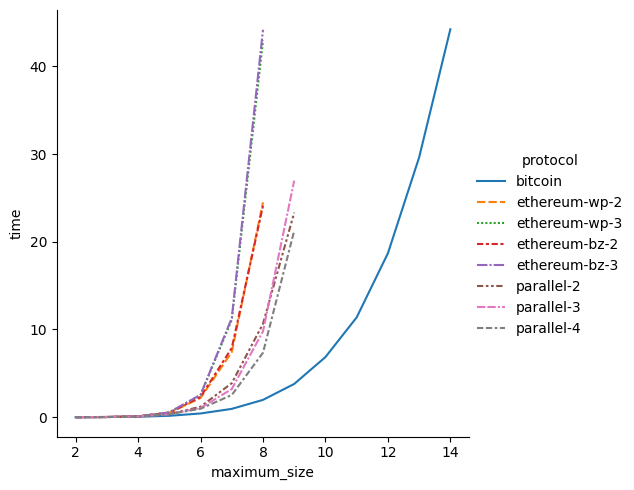

In [7]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="maximum_size",
    y="time",
    hue="protocol",
    style="protocol",
)

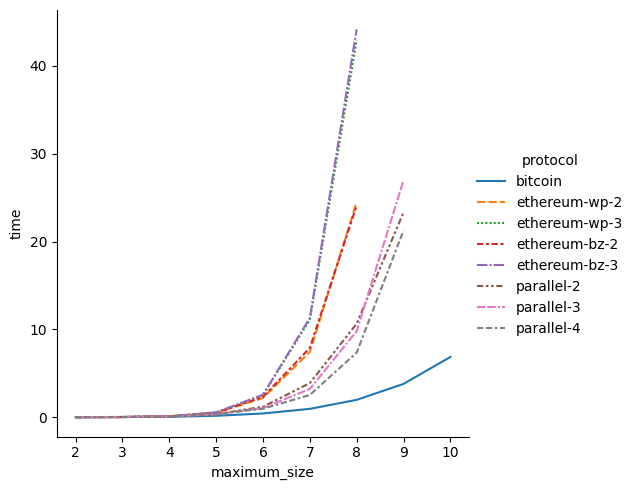

In [8]:
g = sns.relplot(
    data.query("maximum_size > 0 and maximum_size < 11"),
    kind="line",
    x="maximum_size",
    y="time",
    hue="protocol",
    style="protocol",
)

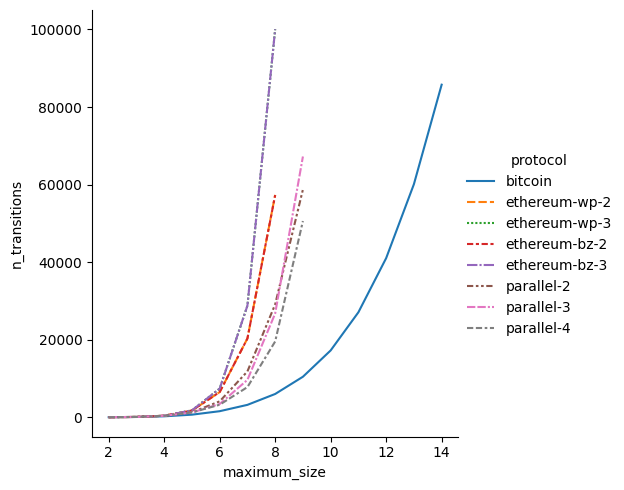

In [9]:
g = sns.relplot(
    data.query("maximum_size > 0"),
    kind="line",
    x="maximum_size",
    y="n_transitions",
    hue="protocol",
    style="protocol",
)